In [616]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import unicodedata

In [618]:
df = pd.read_csv("datos_salud_individual.csv")
print(df.dtypes)

id_paciente               object
fecha_nacimiento          object
edad                       int64
sexo                      object
comuna_residencia         object
fecha_atencion            object
fecha_inicio_sintomas     object
codigo_enfermedad         object
diagnostico_principal     object
estado_salud              object
gravedad                  object
peso_kg                  float64
altura_mt                float64
presion_arterial          object
temperatura_corporal     float64
centro_salud              object
observaciones            float64
dtype: object


In [621]:
#Analisis por variables Categoricas

In [623]:
#comuna_residencia

"""
Columna Comunas con incongruencias:
    -Santiago
    -Coyhaique
    -Las Condes
    -Los angeles
    -Chillan
    -Concepción
    -Viña del Mar
    -Providencia
    -Valparaiso

"""
valores_antiguos_comunas = df["comuna_residencia"].unique()
print(f"Se presentan {len(df["comuna_residencia"][df["comuna_residencia"].isna()])} valores nulos")


#La forma para solucionar este problema va a ser realizar un preprocesamiento de texto utilizando expresiones regulares para encontrar



mapeo_comunas = {
    # Las Condes
    "las condes": "Las Condes",
    "LAS CONDES": "Las Condes",
    "L. Condes": "Las Condes",
    "Condes": "Las Condes",
    "condes" : "Las Condes",
    "l. condes": "Las Condes",
    
    # Providencia
    "providencia": "Providencia",
    "Prov.": "Providencia",
    "PROVIDENCIA": "Providencia",
    "Provi": "Providencia",
    "prov.": "Providencia",
    
    # Viña del Mar
    "viña del mar": "Viña del Mar",
    "Viña": "Viña del Mar",
    "V.Mar": "Viña del Mar",
    "V. del Mar": "Viña del Mar",
    "VIÑA DEL MAR": "Viña del Mar",
    "v.mar": "Viña del Mar",
    "V. Del Mar": "Viña del Mar",
    "Vina" : "Viña del Mar",
    "Vina Del Mar" : "Viña del Mar",
    
    # Chillán
    "chillan": "Chillán",
    "chillán": "Chillán",
    "CHILLÁN": "Chillán",
    
    # Curicó
    "curico": "Curicó",
    "curicó": "Curicó",
    "CURICO": "Curicó",
    
    # Coyhaique
    "coyhaique": "Coyhaique",
    "COYHAIQUE": "Coyhaique",
    "Coihaique": "Coyhaique",
    "coihaique": "Coyhaique",
    
    # Valparaíso
    "valparaiso": "Valparaíso",
    "VALPARAÍSO": "Valparaíso",
    "Valpo": "Valparaíso",
    "Valparaiso" : "Valparaíso",
    
    # Concepción
    "Concep.": "Concepción",
    "Conce": "Concepción",
    "concepcion": "Concepción",
    "CONCEPCIÓN": "Concepción",
    "Concepcion": "Concepción",
    # Los Ángeles
    "los angeles": "Los Ángeles",
    "LOS ÁNGELES": "Los Ángeles",
    "los Ángeles": "Los Ángeles",
    
    # Santiago
    "santiago": "Santiago",
    "SANTIAGO": "Santiago",
    "Stgo": "Santiago",
    "Sant." : "Santiago",
    # Maipú

    "Maipu" : "Maipú",

    #Nuñoa

    "Nunoa" : "Nuñoa"
}


def normalizar_comuna(comuna):
    """
    Función para normalizar las comunas

    Return 
        La comuna normalizada
    """
    if pd.isnull(comuna):
        return comuna
    # Quitar tildes
    comuna = ''.join((c for c in unicodedata.normalize('NFD', comuna) if unicodedata.category(c) != 'Mn'))
    # Minúsculas y quitar espacios
    return comuna.title().strip()

df["comuna_residencia"] = df["comuna_residencia"].apply(normalizar_comuna)
df["comuna_residencia"] = df["comuna_residencia"].replace(mapeo_comunas)
df["comuna_residencia"] = df["comuna_residencia"].map(lambda x: mapeo_comunas.get(x, x))

print("Valores Antiguos")
print(valores_antiguos_comunas)
print("-"*50)
print("Valores despues de realizar el nuevo mapeo")
print(df["comuna_residencia"].unique())
print("-"*50)
print(f"El largo original del DF no se ha modificado {len(df)}")


Se presentan 0 valores nulos
Valores Antiguos
['Temuco' 'Villa Alemana' 'Valdivia' 'Puente Alto' 'Putre' 'Talca'
 'Curicó' 'Ovalle' 'San Bernardo' 'Antofagasta' 'Alto Hospicio' 'Rancagua'
 'Quillota' 'Chillán' 'Arica' 'Talcahuano' 'Los Andes' 'Ñuñoa' 'Castro'
 'Villarrica' 'Las Condes' 'Copiapó' 'Maipú' 'Los Ángeles' 'Quilpué'
 'Calama' 'Providencia' 'Osorno' 'Iquique' 'Santiago' 'Concepción'
 'Viña del Mar' 'V.Mar' 'Valparaíso' 'La Serena' 'CURICO' 'San Fernando'
 'Coquimbo' 'Vallenar' 'La Florida' 'Coyhaique' 'Puerto Montt' 'Sant.'
 'las condes' 'Coihaique' 'Punta Arenas' 'San Antonio' 'Condes'
 'los angeles' 'L. Condes' 'Prov.' 'curico' 'viña del mar' 'chillan'
 'coyhaique' 'COYHAIQUE' 'valparaiso' 'LAS CONDES' 'Concep.' 'Conce'
 'V. del Mar' 'providencia' 'VIÑA DEL MAR' 'coihaique' 'concepcion' 'Viña'
 'santiago' 'los Ángeles' 'VALPARAÍSO' 'LOS ÁNGELES' 'SANTIAGO' 'Valpo'
 'Provi' 'CHILLÁN' 'CONCEPCIÓN' 'curicó' 'PROVIDENCIA' 'Stgo' 'chillán']
--------------------------------------

In [625]:

largo_original = len(df)

"""
Columna Sexo con incongruencias:
        -Se presentan valores de diferente forma tales como H y M para Masculino
        -Se presentan valores de diferente forma tales como F y Mujer para Femenino
        -Hay una V que no deja claro a que corresponde
        -Valores nan o nulos
'M', 'F', 'H', 'Masculino', 'Mujer', nan, 'V', 'Femenino
"""
print(f"Los valores para columna sexo son {df["sexo"].unique()}")
print(f"Se presentan {len(df["sexo"][df["sexo"].isna()])} valores nulos")

#

mapeo_sexo = {
    # Las Condes
    "Masculino": "M",
    "H": "M",

    
    # Providencia
    "Femenino": "F",
    "Mujer": "F",

    "V" : np.nan,
}

df["sexo"] = df["sexo"].replace(mapeo_comunas)
df["sexo"] = df["sexo"].map(lambda x: mapeo_sexo.get(x, x))
print("-"*50)
print(f"Los valores para columna sexo luego de realizar el mapeo son {df["sexo"].unique()}")
print(f"Se presentan luego de realizar el mapeo {len(df["sexo"][df["sexo"].isna()])} valores nulos")

#Como hay una cantidad significativa de nan y como es un valor categorico realizar una imputación puede no entregar los mejores resultados por lo que se procede a borrar los datos nan
df = df.dropna(subset=["sexo"])
print("-"*50)
print(f"Los valores para columna sexo luego de realizar el mapeo son {df["sexo"].unique()}")
print(f"Se presentan luego de realizar el mapeo {len(df["sexo"][df["sexo"].isna()])} valores nulos")

print("-"*50)

print("El largo original es de: ",largo_original)
print("El largo luego de la eliminación es de: ",len(df))
    

Los valores para columna sexo son ['M' 'F' 'H' 'Masculino' 'Mujer' nan 'V' 'Femenino']
Se presentan 822 valores nulos
--------------------------------------------------
Los valores para columna sexo luego de realizar el mapeo son ['M' 'F' nan]
Se presentan luego de realizar el mapeo 1198 valores nulos
--------------------------------------------------
Los valores para columna sexo luego de realizar el mapeo son ['M' 'F']
Se presentan luego de realizar el mapeo 0 valores nulos
--------------------------------------------------
El largo original es de:  53039
El largo luego de la eliminación es de:  51841


Hay 1303 outliers
Hay 647 outliers superiores
Hay 656 outliers inferiores
Los valores inferiores son [-5 -1]
Los valores superiores son [150 999]
Se presentan 0 valores nulos


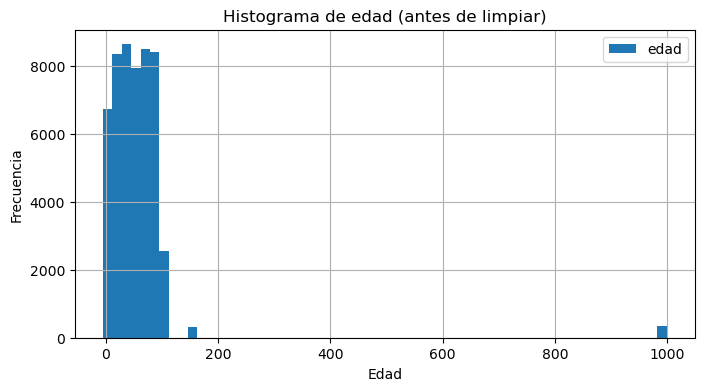

50538
--------------------------------------------------
Nuevos Valores
Hay 0 outliers
Hay 0 outliers superiores
Hay 0 outliers inferiores
Los valores inferiores son []
Los valores superiores son []
Se presentan 0 valores nulos
El largo antes de eliminar los outlier es de : 51841
El largo despues de eliminar los outlier es de : 50538


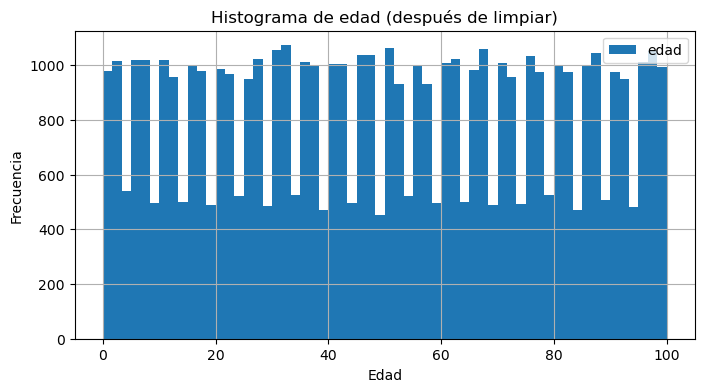

In [627]:
largo_original = len(df)

#https://www.infobae.com/america/ciencia-america/2025/01/31/cual-es-el-tiempo-maximo-que-puede-vivir-un-ser-humano/
#La elección del valor 122 es debido a que la edad maxima registrada ha sido de 122 por lo que este sería el inicio de nuestros outlier superior
#los outliers inferiores son los valores negativos
print(f"Hay {len(df["edad"][(df["edad"] < 0) | (df["edad"] > 122)])} outliers")
print(f"Hay {len(df["edad"][(df["edad"] < 0)])} outliers superiores")
print(f"Hay {len(df["edad"][(df["edad"] > 122)])} outliers inferiores")
print(f"Los valores inferiores son {df["edad"][df["edad"] < 0].unique()}")
print(f"Los valores superiores son {df["edad"][(df["edad"] > 122)].unique()}")
print(f"Se presentan {len(df["edad"][df["edad"].isna()])} valores nulos")
if len(df["edad"]) != len(df):
    print("Hay valores no numericos")
# Antes de limpiar
plt.figure(figsize=(8, 4))
df["edad"].hist(bins=60, legend=True)
plt.title("Histograma de edad (antes de limpiar)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#Solución

df = df[~((df["edad"] < 0) | (df["edad"] > 122))]
print(len(df))

print("-"*50)

print("Nuevos Valores")

print(f"Hay {len(df["edad"][(df["edad"] < 0) | (df["edad"] > 122)])} outliers")
print(f"Hay {len(df["edad"][(df["edad"] < 0)])} outliers superiores")
print(f"Hay {len(df["edad"][(df["edad"] > 122)])} outliers inferiores")
print(f"Los valores inferiores son {df["edad"][df["edad"] < 0].unique()}")
print(f"Los valores superiores son {df["edad"][(df["edad"] > 122)].unique()}")
print(f"Se presentan {len(df["edad"][df["edad"].isna()])} valores nulos")

print("El largo antes de eliminar los outlier es de :" ,largo_original)
print("El largo despues de eliminar los outlier es de :" ,len(df))


# Después de limpiar
plt.figure(figsize=(8, 4))
df["edad"].hist(bins=60, legend=True)
plt.title("Histograma de edad (después de limpiar)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


In [703]:
#Fecha de atención
largo_original = len(df)
"""
Notamos que hay una diferencia de formato en las fechas, haciendo un analisis de valores distintos, encontramos que hay 1031, por lo que mostralo todos no es posible directamente
"""
print(f"Hay {len(df["fecha_atencion"].unique())} fechas distintas")
print(f"Hay {len(dates[dates.isna()])} valores nulos")
import re
def identificar_formato(fecha):
    """
    Identifica los formatos de las fechas presentes utilizando expresiones regulares
    Return
        Tipo de formato de fecha encontrado
    """
    if re.match(r'^\d{4}-\d{2}-\d{2}$', fecha):
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{2}/\d{2}/\d{4}$', fecha):
        return 'DD/MM/YYYY'
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', fecha):
        return 'DD-MM-YYYY'

    else:
        return 'Error'
        
df_pivote = pd.DataFrame()
df_pivote['formato_fecha'] = df['fecha_atencion'].astype(str).apply(identificar_formato)
print("Estado formato antes de la limpieza")
print(df_pivote['formato_fecha'].value_counts())
#Podemos obsevar los distintos formatos para la fecha, variando entre YYYY-MM-DD a DD/MM/YYYY como a DD-MM-YYYY, y Otro que corresponde a datos nulos o invalid_date

#Solución

def normalizar_fecha(fecha):
    """
    Identifica los formatos y modifica el formato a ISO 8601 (YYYY-MM-DD)
    Return
        Fecha en formato : ISO 8601 (YYYY-MM-DD)
        "None" en caso de error
    """
    
    if pd.isnull(fecha):
        return None
    s = str(fecha).strip()
    # Unifica separadores
    s = re.sub(r"[\/\.]", "-", s)
    # YYYY-MM-DD
    if re.match(r"^\d{4}-\d{2}-\d{2}$", s):
        try:
            return datetime.strptime(s, "%Y-%m-%d").strftime("%Y-%m-%d")
        except:
            return None
    # DD-MM-YYYY o MM-DD-YYYY
    m2 = re.match(r"^(\d{2})-(\d{2})-(\d{4})$", s)
    if m2:
        a, b, y = map(int, m2.groups())
        # Casos no ambiguos
        if a > 12 and b <= 12:
            fmt = "%d-%m-%Y"
        elif b > 12 and a <= 12:
            fmt = "%m-%d-%Y"
        elif a > 12 and b > 12:
            return None  # Ambos >12, imposible
        else:  # Ambos <= 12, AMBIGUO
            # Por defecto, elige MM-DD-YYYY si tu caso es de Chile/EEUU
            fmt = "%m-%d-%Y"
        try:
            return datetime.strptime(s, fmt).strftime("%Y-%m-%d")
        except:
            return None
    # Prueba pandas para otros formatos
    try:
        d = pd.to_datetime(s, errors="coerce")
        if pd.isnull(d):
            return None
        return d.strftime("%Y-%m-%d")
    except:
        return None

df['fecha_atencion'] = df['fecha_atencion'].astype(str).apply(normalizar_fecha)

df['formato_fecha'] = df['fecha_atencion'].astype(str).apply(identificar_formato)

print("-"*50)

df = df[df["formato_fecha"] != "Error"]
df = df.dropna(subset=["fecha_atencion"])

df_pivote = pd.DataFrame()
df_pivote['formato_fecha'] = df['fecha_atencion'].astype(str).apply(identificar_formato)
print("Estado formato despues de la limpieza")
print(df_pivote['formato_fecha'].value_counts())
print("-"*50)
print(f"Hay {len(df["fecha_atencion"].unique())} fechas distintas")
dates = (df["fecha_atencion"])
print(f"Hay {len(dates[dates.isna()])} valores nulos")
print("El largo antes de eliminar los errores es de :" ,largo_original)
print("El largo despues de eliminar los errores es de :" ,len(df))
#Se eliminaron también fechas que no existen por lo que puede haber una incongruencia entre los datos mostrados en el analisis del formato




Hay 1030 fechas distintas
Hay 0 valores nulos
Estado formato antes de la limpieza
formato_fecha
YYYY-MM-DD    51241
Error           660
DD/MM/YYYY      364
DD-MM-YYYY      346
Name: count, dtype: int64
--------------------------------------------------
Estado formato despues de la limpieza
formato_fecha
YYYY-MM-DD    51596
Name: count, dtype: int64
--------------------------------------------------
Hay 583 fechas distintas
Hay 0 valores nulos
El largo antes de eliminar los errores es de : 52611
El largo despues de eliminar los errores es de : 51596


In [709]:
#fecha_inicio_sintomas
"""
Notamos que hay una diferencia de formato en las fechas, haciendo un analisis de valores distintos, encontramos que hay 1031, por lo que mostralo todos no es posible directamente
"""
print(f"Hay {len(df["fecha_inicio_sintomas"].unique())} fechas distintas")
print(f"Hay {len(dates[dates.isna()])} valores nulos")
import re
def identificar_formato(fecha):
    """
    Identifica los formatos de las fechas presentes utilizando expresiones regulares
    Return
        Tipo de formato de fecha encontrado
    """
    if re.match(r'^\d{4}-\d{2}-\d{2}$', fecha):
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{2}/\d{2}/\d{4}$', fecha):
        return 'DD/MM/YYYY'
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', fecha):
        return 'DD-MM-YYYY'
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', fecha):
        return 'DD-MM-YYYY'

    else:
        return 'Otro'
        
df_pivote = pd.DataFrame()
df_pivote['formato_fecha'] = df['fecha_inicio_sintomas'].astype(str).apply(identificar_formato)

print(df_pivote['formato_fecha'].value_counts())
#Podemos obsevar los distintos formatos para la fecha, variando entre YYYY-MM-DD a DD/MM/YYYY como a DD-MM-YYYY, y Otro que corresponde a datos nulos o invalid_date

#Solucion

def normalizar_fecha(fecha):
    """
    Identifica los formatos y modifica el formato a ISO 8601 (YYYY-MM-DD)
    Return
        Fecha en formato : ISO 8601 (YYYY-MM-DD)
        "None" en caso de error
    """
    
    if pd.isnull(fecha):
        return None
    s = str(fecha).strip()
    # Unifica separadores
    s = re.sub(r"[\/\.]", "-", s)
    # YYYY-MM-DD
    if re.match(r"^\d{4}-\d{2}-\d{2}$", s):
        try:
            return datetime.strptime(s, "%Y-%m-%d").strftime("%Y-%m-%d")
        except:
            return None
    # DD-MM-YYYY o MM-DD-YYYY
    m2 = re.match(r"^(\d{2})-(\d{2})-(\d{4})$", s)
    if m2:
        a, b, y = map(int, m2.groups())
        # Casos no ambiguos
        if a > 12 and b <= 12:
            fmt = "%d-%m-%Y"
        elif b > 12 and a <= 12:
            fmt = "%m-%d-%Y"
        elif a > 12 and b > 12:
            return None  # Ambos >12, imposible
        else:  # Ambos <= 12, AMBIGUO
            # Por defecto, elige MM-DD-YYYY si tu caso es de Chile/EEUU
            fmt = "%m-%d-%Y"
        try:
            return datetime.strptime(s, fmt).strftime("%Y-%m-%d")
        except:
            return None
    # Prueba pandas para otros formatos
    try:
        d = pd.to_datetime(s, errors="coerce")
        if pd.isnull(d):
            return None
        return d.strftime("%Y-%m-%d")
    except:
        return None

df['fecha_inicio_sintomas'] = df['fecha_inicio_sintomas'].astype(str).apply(normalizar_fecha)

df['formato_fecha'] = df['fecha_inicio_sintomas'].astype(str).apply(identificar_formato)

print("-"*50)

df = df[df["formato_fecha"] != "Error"]
df = df.dropna(subset=["fecha_inicio_sintomas"])

df_pivote = pd.DataFrame()
df_pivote['formato_fecha'] = df['fecha_inicio_sintomas'].astype(str).apply(identificar_formato)
print("Estado formato despues de la limpieza")
print(df_pivote['formato_fecha'].value_counts())
print("-"*50)
print(f"Hay {len(df["fecha_inicio_sintomas"].unique())} fechas distintas")
dates = (df["fecha_inicio_sintomas"])
print(f"Hay {len(dates[dates.isna()])} valores nulos")
print("El largo antes de eliminar los errores es de :" ,largo_original)
print("El largo despues de eliminar los errores es de :" ,len(df))
#Se eliminaron también fechas que no existen por lo que puede haber una incongruencia entre los datos mostrados en el analisis del formato
df.drop("formato_fecha",axis=1,inplace=True)




Hay 516 fechas distintas
Hay 0 valores nulos
formato_fecha
YYYY-MM-DD    51065
Name: count, dtype: int64
--------------------------------------------------
Estado formato despues de la limpieza
formato_fecha
YYYY-MM-DD    51065
Name: count, dtype: int64
--------------------------------------------------
Hay 516 fechas distintas
Hay 0 valores nulos
El largo antes de eliminar los errores es de : 52611
El largo despues de eliminar los errores es de : 51065


In [699]:
#codigo_enfermedad

df = pd.read_csv("datos_salud_individual.csv")

"""
Codigo enfermedad presenta valores nan, como también incongruencia en los codigos presentando el nombre directamente
'Hipertensión', nan, 'Diabetes', 'COVID-19', 'Gripe'
En vez del codigo que presentan las demás categorias

"""
largo_original = len(df)
print(df["codigo_enfermedad"].unique())
print(f"Se presentan {len(df["codigo_enfermedad"][df["codigo_enfermedad"].isna()])} valores nulos")
print(df["diagnostico_principal"][df["codigo_enfermedad"] == "Hipertensión"].unique())

#Solución

print("-"*50)
#En este mapa de codigos utilize el formato ICD-10, esta norma es especifica en caso de COVID-19 y Gripe e hipertensión por lo que al no saber de que tipo son especificamente
#preferi eliminarlo y dejarlos como nan, también se puede hacer una correlación entre el codigo y el diagnostico pero para esto es necesario tener el diccionario completo de los codigos
#ICD-10 por lo que se puede dejar como trabajo a futuro
mapeo_codigo_enfermedad= {
    # Las Condes
    "A09": "A09.9",
    "Hipertensión": np.nan,
    "Diabetes" : "E11.9",
    "COVID-19": np.nan,
    "Gripe" : np.nan,
    "Neumonía": "J18.9",
    "invalid_code": np.nan,
    
}

df["codigo_enfermedad"] = df["codigo_enfermedad"].replace(mapeo_codigo_enfermedad)
df["codigo_enfermedad"] = df["codigo_enfermedad"].map(lambda x: mapeo_sexo.get(x, x))
df = df.dropna(subset=["codigo_enfermedad"])

print(df["codigo_enfermedad"].unique())
print(f"Se presentan {len(df["codigo_enfermedad"][df["codigo_enfermedad"].isna()])} valores nulos")

print("El largo antes de eliminar los nan es de :" ,largo_original)
print("El largo despues de eliminar los nan es de :" ,len(df))





['O99.8' 'C78.0' 'K29.9' 'L30.9' 'H10.9' 'B34.9' 'M79.9' 'S72.9' 'N39.9'
 'E11.9' 'Q90.9' 'F32.9' 'D50.9' 'A09.9' 'I10' 'B34' 'P59.9' 'Z51.1'
 'T14.9' 'R50.9' 'J06.9' 'G43.9' 'Z00.0' 'Hipertensión' nan 'Diabetes'
 'COVID-19' 'Gripe' 'Neumonía' 'A09' 'invalid_code']
Se presentan 146 valores nulos
['Diabetes mellitus' 'Gastroenteritis' 'Infección respiratoria'
 'Control sano' 'Hipertensión arterial']
--------------------------------------------------
['O99.8' 'C78.0' 'K29.9' 'L30.9' 'H10.9' 'B34.9' 'M79.9' 'S72.9' 'N39.9'
 'E11.9' 'Q90.9' 'F32.9' 'D50.9' 'A09.9' 'I10' 'B34' 'P59.9' 'Z51.1'
 'T14.9' 'R50.9' 'J06.9' 'G43.9' 'Z00.0' 'J18.9']
Se presentan 0 valores nulos
El largo antes de eliminar los nan es de : 53039
El largo despues de eliminar los nan es de : 52611


In [635]:
#diagnostico_principal
"""
diagnostico_principal no presenta errores tanto ortograficos como de categorias mencionadas diferente ni valores nulos

"""
print(df["diagnostico_principal"].unique())
print(f"Se presentan {len(df["diagnostico_principal"][df["diagnostico_principal"].isna()])} valores nulos")

['Infección respiratoria' 'Hipertensión arterial' 'Control sano'
 'Gastroenteritis' 'Diabetes mellitus']
Se presentan 0 valores nulos


In [637]:
#estado_salud
"""
estado_salud no presenta errores tanto ortograficos como de categorias mencionadas diferente ni valores nulos

"""
print(df["estado_salud"].unique())
print(f"Se presentan {len(df["estado_salud"][df["estado_salud"].isna()])} valores nulos")

['Enfermo' 'En tratamiento' 'Recuperándose' 'Sano']
Se presentan 0 valores nulos


In [639]:
#gravedad
"""
gravedad no presenta errores tanto ortograficos como de categorias mencionadas diferente ni valores nulos

"""
print(df["gravedad"].unique())
print(f"Se presentan {len(df["gravedad"][df["gravedad"].isna()])} valores nulos")

['Grave' 'Moderado' 'Leve']
Se presentan 0 valores nulos


Hay 0 outliers
Hay 0 outliers superiores
Hay 0 outliers inferiores
Se presentan 0 valores nulos


<Axes: >

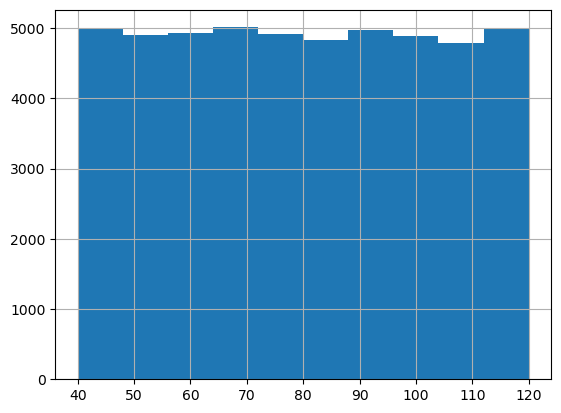

In [641]:
#peso_kg
"""
Dentro de la columna peso no existen outliers como se puede obsevar en el histograma, ni valores menores a 0
"""
print(f"Hay {len(df["peso_kg"][(df["peso_kg"] < 0) | (df["peso_kg"] > 150)])} outliers")
print(f"Hay {len(df["peso_kg"][(df["peso_kg"] < 0)])} outliers superiores")
print(f"Hay {len(df["peso_kg"][(df["peso_kg"] > 122)])} outliers inferiores")
print(f"Se presentan {len(df["peso_kg"][df["peso_kg"].isna()])} valores nulos")
if len(df["peso_kg"]) != len(df):
    print("Hay valores no numericos")
df["peso_kg"].hist()

Hay 0 outliers
Hay 0 outliers superiores
Hay 0 outliers inferiores
Se presentan 0 valores nulos


<Axes: >

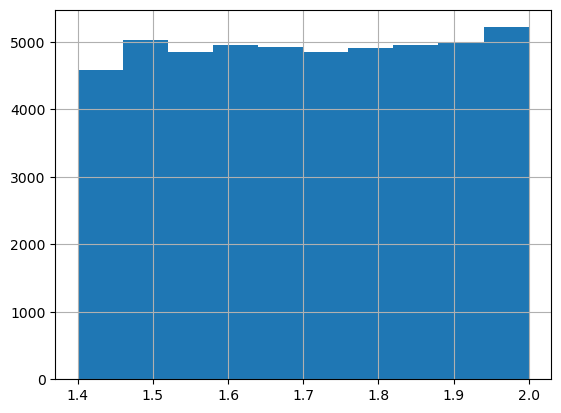

In [643]:
#altura_mt
"""
Dentro de la columna peso_kg no existen outliers como se puede obsevar en el histograma, ni valores menores a 0
"""
print(f"Hay {len(df["altura_mt"][(df["altura_mt"] < 0) | (df["altura_mt"] > 150)])} outliers")
print(f"Hay {len(df["altura_mt"][(df["altura_mt"] < 0)])} outliers superiores")
print(f"Hay {len(df["altura_mt"][(df["altura_mt"] > 122)])} outliers inferiores")
print(f"Se presentan {len(df["altura_mt"][df["altura_mt"].isna()])} valores nulos")
if len(df["altura_mt"]) != len(df):
    print("Hay valores no numericos")
df["altura_mt"].hist()

In [645]:
#presion_arterial

"""
Todos los valores presión están en el mismo formato

"""
def identificar_formato(presion):
    """
    Identifica los formatos de las fechas presentes utilizando expresiones regulares
    Return
        Tipo de formato de fecha encontrado
    """
    if re.match(r'^\d{2,3}/\d{2,3}', presion):
        return "NNN/NN"
    else:
        return 'Otro'
        
df_pivote = pd.DataFrame()
df_pivote['formato_presion'] = df['presion_arterial'].astype(str).apply(identificar_formato)

print(df_pivote['formato_presion'].value_counts())

formato_presion
NNN/NN    49241
Name: count, dtype: int64


Hay 0 outliers
Hay 0 outliers superiores
Hay 0 outliers inferiores
Se presentan 0 valores nulos


<Axes: >

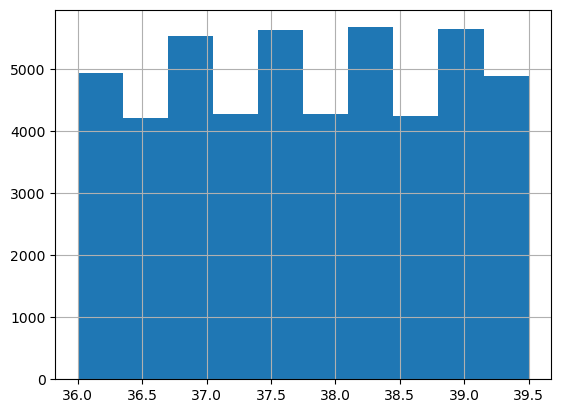

In [647]:
#temperatura_corporal
"""
Dentro de la columna temperatura_corporal no existen outliers como se puede obsevar en el histograma, ni valores menores a 0
"""
print(f"Hay {len(df["temperatura_corporal"][(df["temperatura_corporal"] < 0) | (df["temperatura_corporal"] > 150)])} outliers")
print(f"Hay {len(df["temperatura_corporal"][(df["temperatura_corporal"] < 0)])} outliers superiores")
print(f"Hay {len(df["temperatura_corporal"][(df["temperatura_corporal"] > 122)])} outliers inferiores")
print(f"Se presentan {len(df["temperatura_corporal"][df["temperatura_corporal"].isna()])} valores nulos")
if len(df["temperatura_corporal"]) != len(df):
    print("Hay valores no numericos")
df["temperatura_corporal"].hist()

In [649]:
#centro_salud
"""
centro_salud no presenta errores tanto ortograficos como de categorias mencionadas diferente ni valores nulos

"""
print(df["centro_salud"].unique())
print(f"Se presentan {len(df["centro_salud"][df["centro_salud"].isna()])} valores nulos")

['Hospital Regional' 'Clínica Privada' 'Consultorio Municipal' 'CESFAM']
Se presentan 0 valores nulos


In [651]:
#observaciones
"""
Solo hay valores nulos
"""
print(df["observaciones"].unique())
print(f"Se presentan {len(df["observaciones"][df["observaciones"].isna()])} valores nulos")

[nan]
Se presentan 49241 valores nulos


In [711]:
import pandas as pd

def edad_consistente_solo_nac_edad(row, columna_fecha_nac="fecha_nacimiento", columna_edad="edad", margen=0):
    """
    Verifica si la fecha de nacimiento y la edad son coherentes con el año actual.
    Permite un margen de error de +/- 1 año.
    """
    f_nac = row[columna_fecha_nac]
    edad = row[columna_edad]
    if pd.isnull(f_nac) or pd.isnull(edad):
        return False
    try:
        f_nac = pd.to_datetime(f_nac)
    except:
        return False
    year_actual = datetime.now().year
    edad_calc = year_actual - f_nac.year
    return abs(edad_calc - edad) <= margen and (0 <= edad <= 122)

# Aplica a tu DataFrame:
df["edad_consistente"] = df.apply(edad_consistente_solo_nac_edad, axis=1)

# Ver filas problemáticas:
df_incorrectos = df[~df["edad_consistente"]]
print(f"Cantidad de filas inconsistentes: {len(df_incorrectos)}")
print(df_incorrectos[["fecha_nacimiento", "edad"]].head())

Cantidad de filas inconsistentes: 1302
    fecha_nacimiento  edad
100          unknown    -5
127          unknown   150
135          unknown   999
136          unknown    -1
288          unknown   999


In [707]:
df

,id_paciente,fecha_nacimiento,edad,sexo,comuna_residencia,fecha_atencion,fecha_inicio_sintomas,codigo_enfermedad,diagnostico_principal,estado_salud,gravedad,peso_kg,altura_mt,presion_arterial,temperatura_corporal,centro_salud,observaciones
0,PAC_000000,2000-06-09,25,M,Temuco,2023-04-22,2023-04-12,O99.8,Infección respiratoria,Enfermo,Grave,62.2,1.86,138/66,38.6,Hospital Regional,NaN
1,PAC_000001,1935-06-26,90,M,Villa Alemana,2023-11-13,2023-11-07,C78.0,Hipertensión arterial,En tratamiento,Grave,53.0,1.80,177/101,37.6,Clínica Privada,NaN
2,PAC_000002,1991-06-12,34,F,Valdivia,2023-04-28,2023-04-15,K29.9,Hipertensión arterial,Recuperándose,Moderado,51.2,1.72,144/117,39.5,Consultorio Municipal,NaN
3,PAC_000003,1971-06-17,54,M,Puente Alto,2023-02-26,2023-02-23,O99.8,Control sano,Enfermo,Grave,100.1,1.60,110/89,39.2,Clínica Privada,NaN
4,PAC_000004,1949-06-22,76,F,Putre,2023-10-04,2023-09-25,L30.9,Control sano,Enfermo,Grave,46.9,1.44,106/68,39.1,CESFAM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53034,PAC_053034,1963-06-19,62,F,San Fernando,2023-09-26,2023-09-26,H10.9,Control sano,Enfermo,Grave,83.4,1.70,178/67,38.9,Hospital Regional,NaN
53035,PAC_053035,2007-06-08,18,F,Osorno,2023-06-18,2023-06-15,F32.9,Control sano,En tratamiento,Grave,51.4,1.96,164/68,36.7,Clínica Privada,NaN
53036,PAC_053036,2011-06-07,14,M,Vallenar,2023-08-08,2023-07-26,A09.9,Gastroenteritis,Enfermo,Grave,51.9,1.57,163/88,39.5,CESFAM,NaN
53037,PAC_053037,2009-06-07,16,F,Quillota,2023-05-10,2023-05-05,H10.9,Hipertensión arterial,Recuperándose,Moderado,44.7,1.91,101/80,39.0,CESFAM,NaN
